In [26]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp

In [27]:
# read in data
PATH_TO_WORKBOOK = Path("../data/")
EXCEL_WORKBOOK = "measurements_b3_1.xlsx"
rows, header = tp.metafilereader(PATH_TO_WORKBOOK / EXCEL_WORKBOOK, sheetname="metafile_niacin")


# how about a google drive but that we save a csv file for every day

In [28]:
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental':
        return 1
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 2
    elif row['sex'] == 'male' and row['group'] == 'experimental':
        return 3
    else:
        return -1

def tweak_df(df):
    
    return (df
            # .query("bodyweight != ''")
            .query("bodyweight.notna()", engine="python")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_yesterday": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df = tweak_df(pd.DataFrame(rows, columns=header))

In [29]:
df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56.0,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,B3128,female,experimental,experimental,2024-03-04,2.0,22.6,40.6,37.5,3.1,48.5,44.2,4.3,1
700,B3129,female,control,control,2024-03-04,0.0,21.9,51.8,49.0,2.8,45.7,41.9,3.8,0
701,B3130,female,control,control,2024-03-04,0.0,22.4,43.0,39.6,3.4,45.9,42,3.9,0
702,B3131,female,experimental,experimental,2024-03-04,2.0,22.8,50.1,46.7,3.4,49.3,46.5,2.8,1


In [30]:
df.dtypes

animal_id            object
sex                category
group              category
diet               category
date                 object
niacin              float64
bodyweight          float64
food_yesterday      float64
food_today          float64
food_intake         float64
water_yesterday     float64
water_today          object
water_intake        float64
groupn                int64
dtype: object

In [31]:
df.columns

Index(['animal_id', 'sex', 'group', 'diet', 'date', 'niacin', 'bodyweight',
       'food_yesterday', 'food_today', 'food_intake', 'water_yesterday',
       'water_today', 'water_intake', 'groupn'],
      dtype='object')

In [32]:
df.animal_id.unique()
df.date.unique()

array(['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
       '2024-02-16', '2024-02-17', '2024-02-18', '2024-02-19',
       '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
       '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
       '2024-02-28', '2024-02-29', '2024-03-01', '2024-03-02',
       '2024-03-03', '2024-03-04'], dtype=object)

In [33]:
df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-12,0.0,20.4125,-1.0000,77.4500,-1.0000,-1.0000,-1.0000,0.0
1,female,control,2024-02-13,0.0,19.9375,77.4500,74.5625,2.8875,51.5000,9.0125,0.0
2,female,control,2024-02-14,0.0,20.0625,74.5625,71.6250,2.9375,51.2875,3.0625,0.0
3,female,control,2024-02-15,0.0,20.0875,71.6250,68.6375,2.9875,51.5250,3.0000,0.0
4,female,control,2024-02-16,0.0,20.2125,72.7875,69.4250,3.3625,51.7500,3.1500,0.0
...,...,...,...,...,...,...,...,...,...,...,...
83,male,experimental,2024-02-29,4.0,26.5750,54.3375,51.5250,2.8125,51.8375,2.5500,3.0
84,male,experimental,2024-03-01,4.0,26.7625,51.5250,48.5500,2.9750,49.2875,2.6500,3.0
85,male,experimental,2024-03-02,4.0,26.8500,48.5500,45.7375,2.8125,46.6375,2.8250,3.0
86,male,experimental,2024-03-03,2.0,26.8750,49.5625,46.6750,2.8875,51.7375,2.5750,3.0


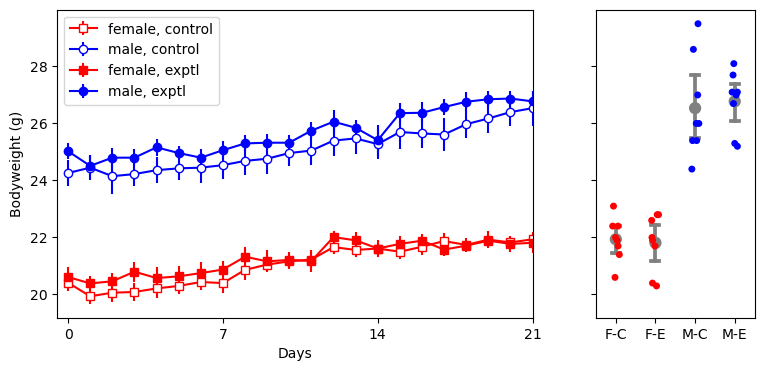

In [34]:
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem = df.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(9, 4), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

In [35]:
today_df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
672,B3101,male,control,control,2024-03-04,0.0,24.4,35.3,33.1,2.2,42.7,40.4,2.3,2
673,B3102,male,control,control,2024-03-04,0.0,25.4,35.0,32.4,2.6,51.5,48.9,2.6,2
674,B3103,male,experimental,experimental,2024-03-04,2.0,25.2,56.3,53.9,2.4,48.9,46.7,2.2,3
675,B3104,male,experimental,experimental,2024-03-04,2.0,27.1,49.4,46.9,2.5,49.4,47.4,2.0,3
676,B3105,male,control,control,2024-03-04,0.0,28.6,59.6,55.7,3.9,48.4,45.5,2.9,2
677,B3106,male,control,control,2024-03-04,0.0,29.5,63.1,59.2,3.9,48.7,46.2,2.5,2
678,B3107,male,experimental,experimental,2024-03-04,2.0,27.1,43.6,40.8,2.8,49.7,47.7,2.0,3
679,B3108,male,experimental,experimental,2024-03-04,2.0,26.7,44.1,41.7,2.4,50.0,48.1,1.9,3
680,B3109,male,control,control,2024-03-04,0.0,27.0,52.8,49.5,3.3,51.6,49.1,2.5,2
681,B3110,male,control,control,2024-03-04,0.0,26.0,55.5,53.0,2.5,51.0,48.9,2.1,2


In [36]:
today

'2024-03-04'

In [37]:
df.head()

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56.0,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2


In [38]:
# Food intake figure

# Clean up df

def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 1:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
    
    print("the number of outliers being replaced for", column, "is", np.sum(np.isnan(values)))
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(water_intake = lambda df_: replace_outliers(df_, "water_intake"))
    )

df_food_water = remove_and_clean(df)

the number of outliers being replaced for food_intake is 6
the number of outliers being replaced for water_intake is 4


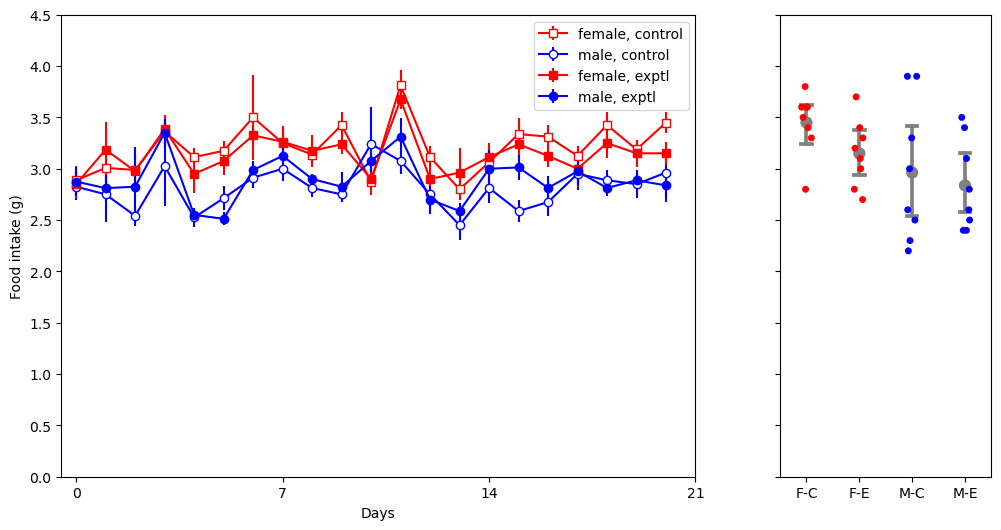

In [39]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()


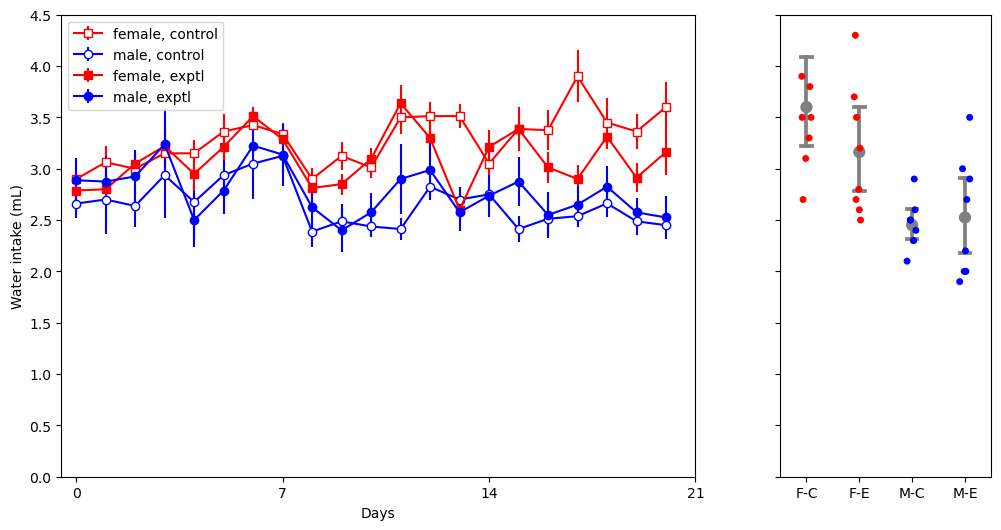

In [41]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem(numeric_only=True).reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake,
               marker="s", markerfacecolor="white", color="red",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               marker="s", markerfacecolor="red", color="red",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,21])
ax[0].set_xticks([0,7,14,21])

ax[0].set_ylim([0,4.5])

# Add labels
ax[0].set_ylabel("Water intake (mL)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["red", "red", "blue", "blue"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (mL)")
ax[1].legend().remove()


In [42]:
df.query("date == '2024-02-13'")

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
32,B3101,male,control,control,2024-02-13,0.0,22.4,60.7,57.2,3.5,50.9,48.3,2.6,2
33,B3102,male,control,control,2024-02-13,0.0,24.5,56.0,53.2,2.8,50.4,47.7,2.7,2
34,B3103,male,experimental,control,2024-02-13,0.0,23.2,54.5,50.9,3.6,50.5,48,2.5,3
35,B3104,male,experimental,control,2024-02-13,0.0,24.9,54.5,51.7,2.8,50.5,48,2.5,3
36,B3105,male,control,control,2024-02-13,0.0,25.6,56.3,53.6,2.7,50.9,48.2,2.7,2
37,B3106,male,control,control,2024-02-13,0.0,26.4,52.5,49.3,3.2,51.0,48.5,2.5,2
38,B3107,male,experimental,control,2024-02-13,0.0,24.6,62.0,59.4,2.6,50.6,48.1,2.5,3
39,B3108,male,experimental,control,2024-02-13,0.0,26.0,57.7,54.6,3.1,50.7,48.4,2.3,3
40,B3109,male,control,control,2024-02-13,0.0,23.9,60.5,57.7,2.8,49.0,47,2.0,2
41,B3110,male,control,control,2024-02-13,0.0,24.2,65.2,62.8,2.4,50.4,47.9,2.5,2


In [43]:
df_food_water.groupby(["sex", "group", "date"]).mean(numeric_only=True).reset_index()

,sex,group,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_intake,groupn
0,female,control,2024-02-13,0.0,19.9375,77.4500,74.5625,2.887500,51.5000,2.899375,0.0
1,female,control,2024-02-14,0.0,20.0625,74.5625,71.6250,3.008125,51.2875,3.062500,0.0
2,female,control,2024-02-15,0.0,20.0875,71.6250,68.6375,2.987500,51.5250,3.000000,0.0
3,female,control,2024-02-16,0.0,20.2125,72.7875,69.4250,3.362500,51.7500,3.150000,0.0
4,female,control,2024-02-17,0.0,20.3000,69.4250,66.3125,3.112500,48.6000,3.150000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
79,male,experimental,2024-02-29,4.0,26.5750,54.3375,51.5250,2.812500,51.8375,2.550000,3.0
80,male,experimental,2024-03-01,4.0,26.7625,51.5250,48.5500,2.975000,49.2875,2.650000,3.0
81,male,experimental,2024-03-02,4.0,26.8500,48.5500,45.7375,2.812500,46.6375,2.825000,3.0
82,male,experimental,2024-03-03,2.0,26.8750,49.5625,46.6750,2.887500,51.7375,2.575000,3.0


In [44]:
mean_fw.query("sex == 'female' and group == 'control'").water_intake
sem_fw.query("sex == 'female' and group == 'control'").water_intake

0     0.103080
1     0.155767
2     0.147600
3     0.098198
4     0.126773
5     0.170018
6     0.045316
7     0.086474
8     0.105221
9     0.135949
10    0.102535
11    0.161466
12    0.141973
13    0.120175
14    0.118019
15    0.218303
16    0.194340
17    0.253546
18    0.238298
19    0.168965
20    0.241276
Name: water_intake, dtype: float64

In [45]:
# List of figures

# body weight graphs
# body weight of CON vs ND, male vs female
# bar graph and daily line graph
# most recent day change from last 3 days? (barscatter)


# food intake



# niacin concentration



#individual mice showing all on one graph

In [46]:
# Food intake figure

# Clean up df

def replace_outliers(df, column):
    
    values=[]
    for idx, row in df.iterrows():
        if row[column] < 1:
            values.append(np.nan)
        elif row[column] > np.mean(df[column]) * 2:
            values.append(np.nan)
        else:
            values.append(row[column])
            
    df[column] = values
    mean_by_animal = df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()
            
    values=[]
    for idx, row in df.iterrows():
        if np.isnan(row[column]):
            values.append(mean_by_animal.query('animal_id == @row.animal_id')[column].values[0])
        else:
            values.append(row[column])
    
    return values
    
def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: replace_outliers(df_, "food_intake"))
            .assign(water_intake = lambda df_: replace_outliers(df_, "water_intake"))
    )

df_food_water = remove_and_clean(df)

# replace_outliers(df, "food_intake")

In [47]:
df_food_water

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
32,B3101,male,control,control,2024-02-13,0.0,22.4,60.7,57.2,3.5,50.9,48.3,2.6,2
33,B3102,male,control,control,2024-02-13,0.0,24.5,56.0,53.2,2.8,50.4,47.7,2.7,2
34,B3103,male,experimental,control,2024-02-13,0.0,23.2,54.5,50.9,3.6,50.5,48,2.5,3
35,B3104,male,experimental,control,2024-02-13,0.0,24.9,54.5,51.7,2.8,50.5,48,2.5,3
36,B3105,male,control,control,2024-02-13,0.0,25.6,56.3,53.6,2.7,50.9,48.2,2.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,B3128,female,experimental,experimental,2024-03-04,2.0,22.6,40.6,37.5,3.1,48.5,44.2,4.3,1
700,B3129,female,control,control,2024-03-04,0.0,21.9,51.8,49.0,2.8,45.7,41.9,3.8,0
701,B3130,female,control,control,2024-03-04,0.0,22.4,43.0,39.6,3.4,45.9,42,3.9,0
702,B3131,female,experimental,experimental,2024-03-04,2.0,22.8,50.1,46.7,3.4,49.3,46.5,2.8,1


In [48]:
a = np.nan
np.isnan(a)

True

In [49]:
df.groupby(["animal_id"]).mean(numeric_only=True).reset_index()

,animal_id,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_intake,groupn
0,B3101,0.000000,22.613636,56.836364,56.972727,2.622727,45.118182,2.177273,2.0
1,B3102,0.000000,24.740909,52.522727,52.463636,2.604545,45.413636,2.518182,2.0
2,B3103,14.704545,24.104545,50.250000,50.113636,2.613636,46.518182,2.359091,3.0
3,B3104,14.704545,26.027273,46.627273,46.390909,2.713636,46.990909,2.181818,3.0
4,B3105,0.000000,26.881818,52.763636,52.531818,2.790909,45.350000,2.695455,2.0
5,B3106,0.000000,26.822727,52.772727,52.368182,2.790909,45.640909,2.381818,2.0
6,B3107,14.704545,26.000000,49.595455,49.904545,2.509091,46.395455,2.231818,3.0
7,B3108,14.704545,26.218182,51.568182,51.559091,2.631818,46.663636,2.113636,3.0
8,B3109,0.000000,25.290909,52.245455,52.390909,2.604545,45.550000,2.295455,2.0
9,B3110,0.000000,25.113636,53.063636,53.445455,2.581818,45.836364,2.122727,2.0
